In [10]:
import matplotlib as mp
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [35]:
vectors = np.loadtxt('mfeat-pix.txt')
zeros = vectors[0:200]

In [23]:
def showImage(vectors):
    imageMatrix = vectors.reshape(16, 15)
    plt.imshow(imageMatrix, cmap = 'gray')
    plt.show()
def imageCat(vectors): 
    for rows in vectors: 
        showImage(rows)

In [25]:
def distance(p1, p2):
    diff = p1 - p2
    s = np.sum(np.power(diff, 2))
    return np.sqrt(s)

In [26]:
def classify(pixels, centers): 
    
    num_centers, _ = centers.shape
    num_pixels, _ = pixels.shape
    distances = np.zeros((num_centers, num_pixels))
    
    for i in range(num_centers): 
        for j in range(num_pixels): 
            distances[i][j] = distance(centers[i], pixels[j])
    return np.argmin(distances, axis = 0)

In [27]:
def find_cluster(pixels, centers): 
    num_centers, _ = centers.shape
    num_pixels, dim = pixels.shape
    
    classified = classify(pixels, centers)
    for c in range(num_centers): 
        sum = np.zeros(dim)
        count = 0 
        for i in range(num_pixels): 
            if(classified[i] == c): 
                sum += pixels[i]
                count += 1
        mean = sum / count 
        centers[c] = mean
    return centers 

In [28]:
def k_means(pixels, k, iterations): 
    centers = pixels[0:k]
    for i in range(iterations): 
        centers = find_cluster(pixels, centers)
    return centers

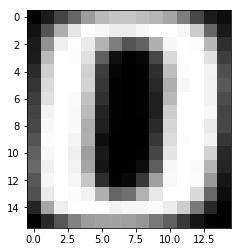

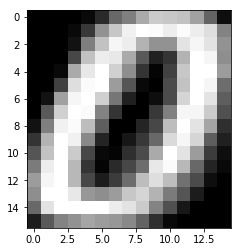

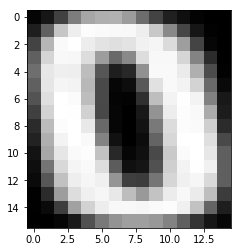

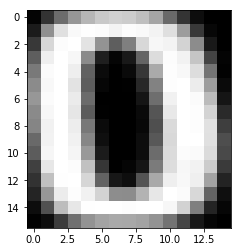

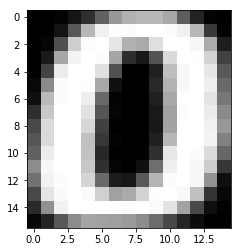

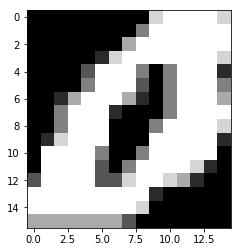

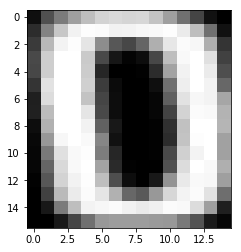

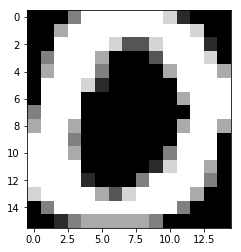

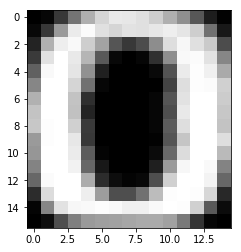

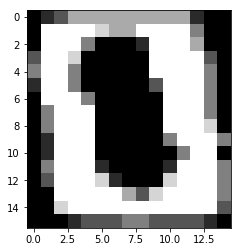

(10, 240)

In [39]:
centers = k_means(zeros, 10, 10)
imageCat(centers)
centers.shape